# K-Nearest Neighbor Tutorial

This tutorial will give you an introduction to K-Nearest Neighbor (KNN) algorithm. This algorithm is an instance-based method which uses data instances to makes predictions. This requires the training data to be stored and used for evaluation of validation and test data. KNN is non-parametric as there are no parameters being learned during the training process. However, it does have a hyperparameter 'k' which refers to the number of neighbors to consider when evaluating a new data point. This algorithm is especially recognized for its ability to be used in classification and regression problems. 

In this tutorial, we will discuss the details of implementing the KNN algorithm in Python. We will begin with preprocessing the data and then calculating the euclidean distance between data points. Next, we will touch upon how to find the k nearest neighbors for a data point and accordingly label that point. Then, we will learn how to optimize the hyperparameter of 'k' by performing cross-validation. Lastly, once we have fixed an optimal value of 'k', we will see how to predict the label for the test data set.

## Table of Contents

<a href="#section1" >About dataset</a>
<br>
<a href="#section2" >Packages required </a>
<br>
<a href="#section3" >Reading data from csv files</a>
<br>
<a href="#section4" >Data Preprocessing</a>
<br>
<a href="#section5" >Euclidean distance</a>
<br>
<a href="#section6" >K Nearest Neighbors</a>
<br>
<a href="#section7" >How to choose the value of k</a>
<br>
<a href="#section8" >Plot training and test data set</a>
<br>
<a href="#section9" >Predicting Labels</a>
<br>
<a href="#section10" >Tutorial Summary</a>
<br>
<a href="#section11" >Further Resources</a>

<a id='section1'></a>
## About dataset

In this tutorial, we will be using the Iris Data Set
(Reference : http://archive.ics.uci.edu/ml/datasets/Iris).
This data set has three unique labels i.e., Iris-setosa, Iris-virginica and Iris-versicolor. Each data point has four features. They are sepal_length, sepal_width, petal_length and petal_width (in cm). Based on these four features, we are labeling the each data point.

The iris data set is divided into train and test set. We will use 80% of data set as train and 20% as test data. For this tutorial, we have divided the dataset into two separate csv files i.e., iris_data_train.csv and iris_data_test.csv


<a id='section2'></a>
## Packages required 

These are the packages that we are going to use in our tutorial.

In [28]:
import numpy as np
import matplotlib.pyplot as plt
import math
import warnings
warnings.filterwarnings('ignore')

<a id='section3'></a>
## Reading data from csv files

In this section, we will read data from __iris_data_train.csv__ and __iris_data_test.csv__.

In [29]:
## TRAIN DATA ##

#read data from train csv file into trainData
train_data = np.genfromtxt("iris_data_train.csv", delimiter=",", names=True, dtype=None)
#get the headings
headings = train_data.dtype.names

#get the features list from the trainData
f1_train = train_data[headings[0]] 
f2_train = train_data[headings[1]]
f3_train = train_data[headings[2]] 
f4_train = train_data[headings[3]] 

#get the labels list from trainData
labelList_train = train_data[headings[4]]

## TEST DATA ##

#read data from test csv file into testData
test_data = np.genfromtxt("iris_data_test.csv", delimiter=",", names=True, dtype=None)

#get the features list from the testData
f1_test = test_data[headings[0]] 
f2_test = test_data[headings[1]]
f3_test = test_data[headings[2]] 
f4_test = test_data[headings[3]] 

#get the labels list from testData
labelList_test = test_data[headings[4]]

# set_label=set(labelList1)
# for d in set_label:
#     print(d.decode("utf-8"))


Sample row in train_data:

| sepal_length | sepal_width | petal_length | petal_width| Label  |         
| :- |-------------: | :-:
|5.1| 3.5  | 1.4 |  0.2  | Iris-setosa  |



In [30]:
train_data[0]

(5.1, 3.5, 1.4, 0.2, b'Iris-setosa')

<a id='section4'></a>
## Data Preprocessing

While there are various ways to preprocess data, we will be using data normalization in our tutorial. Data normalization scales a dataset in the range of 0 to 1. The range of all features needs to be normalized so that each feature's contribution is proportional to the final result (Euclidean distance in our case). We will talk in detail about Euclidean distance in our later topics. Data Normalization is necessary when different features have highly varying range of values or scales. 

Normalization is achieved by using following formula:

x_normalized = ( x − x_min ) / ( x_max − x_min )

(The features sepal_length, sepal_width, petal_length and petal_width are in cm. )

In [31]:
## TRAIN DATA ##
# find min and max of each feature
minf1_train, maxf1_train = min(f1_train), max(f1_train)
minf2_train, maxf2_train = min(f2_train), max(f2_train)
minf3_train, maxf3_train = min(f3_train), max(f3_train)
minf4_train, maxf4_train = min(f4_train), max(f4_train)

#Normalize each train feature
f1_train_norm = []
f2_train_norm = []
f3_train_norm = []
f4_train_norm = []

for x in f1_train:
    x_norm = (x-minf1_train)/(maxf1_train-minf1_train)
    f1_train_norm.append(x_norm)

for x in f2_train:
    x_norm = (x-minf2_train)/(maxf2_train-minf2_train)
    f2_train_norm.append(x_norm)   
    
for x in f3_train:
    x_norm = (x-minf3_train)/(maxf3_train-minf3_train)
    f3_train_norm.append(x_norm)

for x in f4_train:
    x_norm = (x-minf4_train)/(maxf4_train-minf4_train)
    f4_train_norm.append(x_norm) 

norm_train_dataArray = []
for i in range(len(f1_train_norm)):
    norm_train_dataArray.append([f1_train_norm[i],f2_train_norm[i],f3_train_norm[i],f4_train_norm[i],labelList_train[i]])

## TEST DATA ##
# find min and max of each feature
minf1_test, maxf1_test = min(f1_test), max(f1_test)
minf2_test, maxf2_test = min(f2_test), max(f2_test)
minf3_test, maxf3_test = min(f3_test), max(f3_test)
minf4_test, maxf4_test = min(f4_test), max(f4_test)

#Normalize each test feature
f1_test_norm = []
f2_test_norm = []
f3_test_norm = []
f4_test_norm = []

for x in f1_test:
    x_norm = (x-minf1_test)/(maxf1_test-minf1_test)
    f1_test_norm.append(x_norm)

for x in f2_test:
    x_norm = (x-minf2_test)/(maxf2_test-minf2_test)
    f2_test_norm.append(x_norm)   
    
for x in f3_test:
    x_norm = (x-minf3_test)/(maxf3_test-minf3_test)
    f3_test_norm.append(x_norm)

for x in f4_test:
    x_norm = (x-minf4_test)/(maxf4_test-minf4_test)
    f4_test_norm.append(x_norm) 

norm_test_dataArray = []
for i in range(len(f1_test_norm)):
    norm_test_dataArray.append([f1_test_norm[i],f2_test_norm[i],f3_test_norm[i],f4_test_norm[i],labelList_test[i]])


Sample row in norm_train_dataArray:

| sepal_length | sepal_width | petal_length | petal_width| Label  |         
| :- |-------------: | :-:
|0.2222| 0.6249  | 0.067 |  0.0416  | Iris-setosa  |

<a id='section5'></a>
## Euclidean distance

In mathematics, the Euclidean distance or Euclidean metric is the "ordinary" straight-line distance between two points in Euclidean space.
(Reference : https://en.wikipedia.org/wiki/Euclidean_distance)

In KNN, we use Euclidean distance to find the distance or similarity measure between two data points. As KNN is about finding k nearest neighbors, we will first find out the euclidean distance between the given test data point and all the training data points. We will then choose the k neighbors with comparatively smaller distances than the rest of the neighbors.

Euclidean distance is the square root of the sum of the squared differences between each features of the two data points or the two data instances.
In our case, Euclidean distance between any two data points or data instances would be:

Where f1_data1, f2_data1, f3_data1, f4_data1 are the four normalized features of first data instance while f1_data2, f2_data2, f3_data2 and f4_data2 are the four normalized features of second data instance.<br>
(Euclidean distance function is the most widely used distance metric in KNN.)

$$\sqrt{(f1\_data1-f1\_data2)^2+(f2\_data1-f2\_data2)^2+(f3\_data1-f3\_data2)^2+(f4\_data1-f4\_data2)^2}$$

In [32]:
def euclideanDistance(data1, data2):
    """
    Args:
        data1 : first data point
        data2 : second data point
        
    Returns:
        euclidean distance between data1 and data2
    """
    euclidean_distance = 0
    
    for i in range(0,len(data1)-1):
        euclidean_distance+=math.pow((data1[i]-data2[i]),2)
    return math.sqrt(euclidean_distance)
        

In [33]:
# For e.g.- 
print(euclideanDistance([1,2,3,4,"a"], [2,3,4,5,"b"]))

2.0


<a id='section6'></a>
## K Nearest Neighbors

For each test data point, we will now find euclidean distances of that test data point and all the training data points. We will then select the k nearest neighbors from all the neighbors (training set).

In [34]:
def knn(k, test_instance, train_dataArray):
    """
    Args:
        k : the number of nearest neighbors to be returned
        test_instance : the data point whose neighbors are calculated
        train_dataArray: all the train data set
        
    Returns:
        list of k nearest neighbors where each neighbor is in the form of tuple (distance,label)
    """
    distances = {}
    for neighbor in train_dataArray:
        distances[euclideanDistance(test_instance, neighbor)]=neighbor[4]
        
    #sort the dictionary in ascending order of distances
    sorted_distances = []
    for dist in sorted(distances.keys()):
        sorted_distances.append((dist, distances[dist]))
    return sorted_distances[0:k]

<a id='section7'></a>
## How to choose the value of k

Now comes the important question. How do you think we can choose the value of k? Can we just measure the error rate by predicting labels on the test data for different values of k and choose the k which gives the lowest error rate? 

The answer is no. The test data should be left unseen. It would be cheating if we selected k, the hyper parameter of our KNN algorithm, based on error rate of test data.

Since we are not allowed to use our test data set for evaluation of our algorithm, we can use a validation set to evaluate our KNN algorithm for different values of k. But where would we get the validation data from? The answer is simple. From our train data set, we can keep aside a certain set of data for evaluation purpose. We will call this our validation data set.

(For our tutorial, we will take one fifth (1/5th) of the total training data set and make it validation data set. Then our __minimum__ possible value of __k__ will be __1__ and __maximum__ possible value of __k__ will be __size of new training data set__.)

In [35]:
def splitData(tot_train_data, start_idx, N="5"):
    """
    Args:
        tot_train_data : Original train data array
        start_idx : start index to get the validation data
        N : N-folds
        
    Returns:
        tuple of validation data array and new train data array splitted from Original data array
    """
    #val_idx = np.random.choice(len(tot_train_data), int(len(tot_train_data)/5), replace=False)
    val_idx = [start_idx+i for i in range(int(len(tot_train_data)/N))]
    validation_data = [tot_train_data[i] for i in val_idx]
    train_data = [tot_train_data[i] for i in range(len(tot_train_data)) if i not in val_idx]
    return validation_data, train_data        

In [36]:
# length of total train data, new train data, validation data after splitting for N=5
v,t = splitData(norm_train_dataArray,0, 5)
print(len(norm_train_dataArray), len(t), len(v))

120 96 24


### Cross validation

We know training and evaluating on the same data is a mistake because it will overfit the data. To avoid this, we held out a part of the training data and called it our validation data. 

One famous approach of evaluating our model is cross validation. Here, we split our training data into a number of folds. If we have N folds, then we will first train using (N−1) of the folds, and evaluate the accuracy on the left-out single fold. We will then repeat this process N times until each fold has been used as the validation set.

For the tutorial purpose, we will assign __N=5__

In [37]:
def evaluation(k, valOrTest_data, train_data):
    """
    Args:
        k : the number of nearest neighbors to be returned
        validation_data : validation data array
        train_data : train data array
        
    Returns:
        error rate evaluated on validation_data
    """
    error = 0
    for instance in valOrTest_data:
                
        #create a default dictionary with all labels as keys and their counts as values(initialized to 0)
        label_count = {label:0 for label in set(labelList_train)} 
        
        #find the k nearest neighbors
        nNeighbors = knn(k, instance, train_data)
        
        #find the count of each label from the neighbors
        for neighbor in nNeighbors:
            label = neighbor[1]
            label_count[label]+=1
        
        #sort the label_count dictionary in descending order of count
        label_count = [(i,label_count[i]) for i in sorted(label_count, key=label_count.get, reverse=True)]
        
        #choose the label with maximum count from the k nearest neighbors
        predicted_label = label_count[0][0]
        
        true_label = instance[4]

        #check for error
        if predicted_label!=true_label:
            error+=1
            
    return error/len(valOrTest_data)

In [38]:
def cross_validation(tot_train_data, N=5):
    """
    Args:
        tot_train_data : the total normalized train data set
        N : Number of folds of total training data to be made
        
    Returns:
        train error rate, validation error rate and k values for that train data set with number of folds as N
    """
    
    if N<=1:
        print("N should be higher than 1")
        None,None,None
        
    # gives [0, 24, 48, 72, 96] for N=5
    start_idx = [i*int(len(tot_train_data)/N) for i in range(N)]
    errors_train = []
    errors_val = []
    k_list = []
    new_train_size = int((N-1)*len(tot_train_data)/N)
    
    for k in range(1,new_train_size+1):
        k_train_error = []
        k_val_error = []
        
        # store the values of k
        k_list.append(k)
        
        for idx in start_idx:

            # split the total train data into train and validation data 
            validation_data, train_data = splitData(tot_train_data, idx, N)

            # find train error for that value of k
            k_train_error.append(evaluation(k, train_data, train_data))
            
            # find validation error for that value of k 
            k_val_error.append(evaluation(k, validation_data, train_data))
            
        # find mean of N-folds errors and add it to the final error list of both train and validation
        errors_train.append(np.mean(k_train_error))
        errors_val.append(np.mean(k_val_error)) 
        
    return errors_train, errors_val, k_list


In [39]:
#store the training error rates, validation error rates and k
train_error_rates, val_error_rates, k_list = cross_validation(norm_train_dataArray, 5)

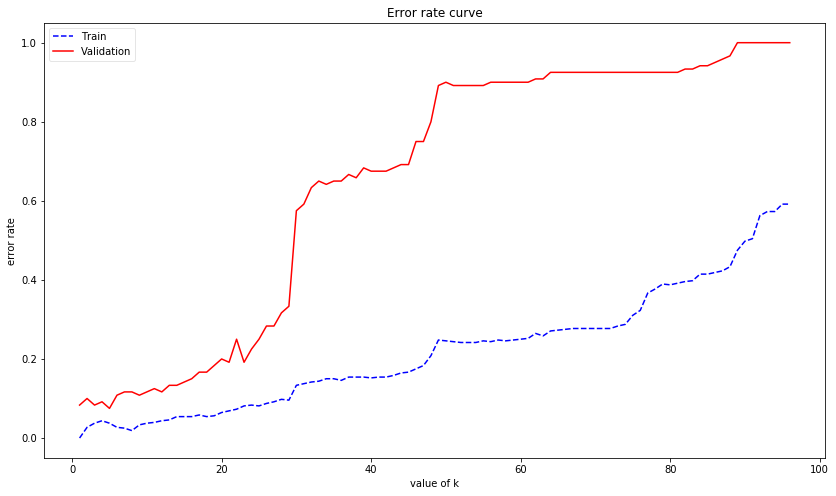

In [40]:
## Plot the training and validation error rates for different values of k
plt.plot(k_list,train_error_rates,'b',label='Train',linestyle='--')
plt.plot(k_list,val_error_rates,'r',label='Validation')
plt.rcParams['figure.figsize'] = (14,8)
plt.xlabel("value of k")
plt.ylabel("error rate")
plt.title("Error rate curve")
legend = plt.legend(loc="best")
legend.get_frame().set_alpha(0.5)
plt.show()

In [41]:
# find the value of k with minimum validation error
k = len(val_error_rates)-val_error_rates[::-1].index(min(val_error_rates))
print(k)

5


From the above analysis of plots, we will take __k=5__ to predict values in our test data set.

<a id='section8'></a>
## Plot training and test data set

In [42]:
def plotPoints(dataArray,title):
    """
    dataArray : Array of data to be plotted
    title : "train" or "test"
    """
    l1_sepal_x,l1_sepal_y,l1_petal_x,l1_petal_y=[],[],[],[]
    l2_sepal_x,l2_sepal_y,l2_petal_x,l2_petal_y=[],[],[],[]
    l3_sepal_x,l3_sepal_y,l3_petal_x,l3_petal_y=[],[],[],[]

    for data in dataArray:
        sepal_length,sepal_width, petal_length, petal_width,label = data[0],data[1],data[2],data[3],data[4].decode('utf-8')
        if label=='Iris-virginica':
            l1_sepal_x.append(sepal_length)
            l1_sepal_y.append(sepal_width)
            l1_petal_x.append(petal_length)
            l1_petal_y.append(petal_width)
        if label=='Iris-setosa':
            l2_sepal_x.append(sepal_length)
            l2_sepal_y.append(sepal_width)
            l2_petal_x.append(petal_length)
            l2_petal_y.append(petal_width)
        if label=='Iris-versicolor':
            l3_sepal_x.append(sepal_length)
            l3_sepal_y.append(sepal_width)
            l3_petal_x.append(petal_length)
            l3_petal_y.append(petal_width)


    plt.plot(l1_sepal_x,l1_sepal_y,'ro',label="Iris-virginica")
    plt.plot(l2_sepal_x,l2_sepal_y,'bo',label="Iris-setosa")
    plt.plot(l3_sepal_x,l3_sepal_y,'go',label="Iris-versicolor")
    plt.xlabel("sepal_length")
    plt.ylabel("sepal_width")
    plt.legend()
    plt.title(title)
    plt.show()
    plt.plot(l1_petal_x,l1_petal_y,'ro',label="Iris-virginica")
    plt.plot(l2_petal_x,l2_petal_y,'bo',label="Iris-setosa")
    plt.plot(l3_petal_x,l3_petal_y,'go',label="Iris-versicolor")
    plt.xlabel("petal_length")
    plt.ylabel("petal_width")
    plt.legend()
    plt.title(title)
    plt.show()


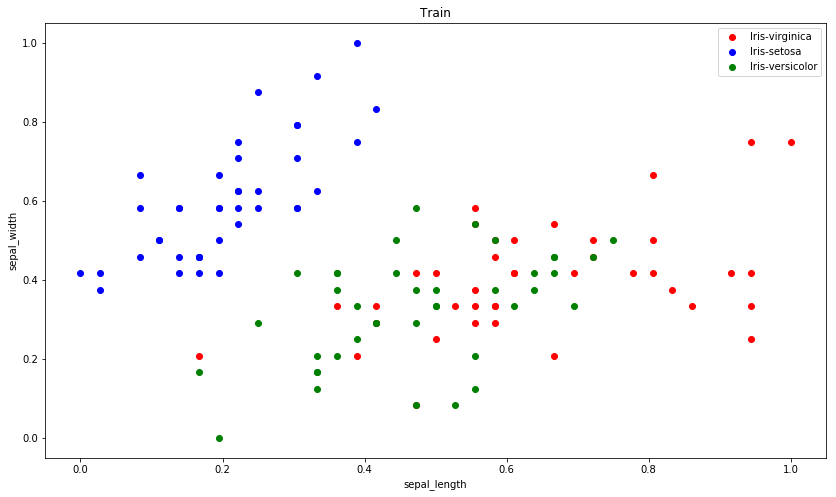

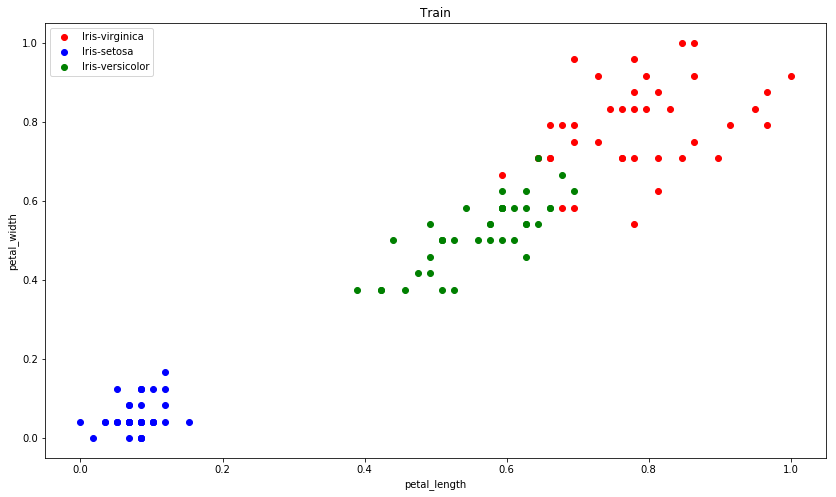

In [43]:
plotPoints(norm_train_dataArray,"Train")

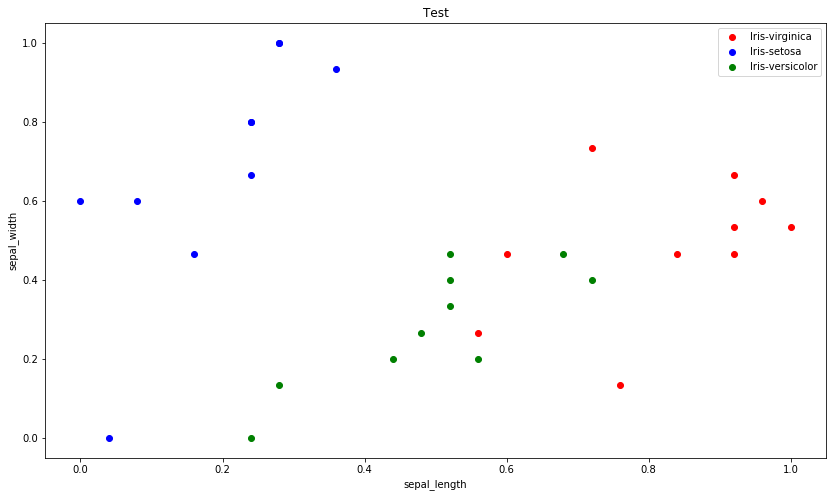

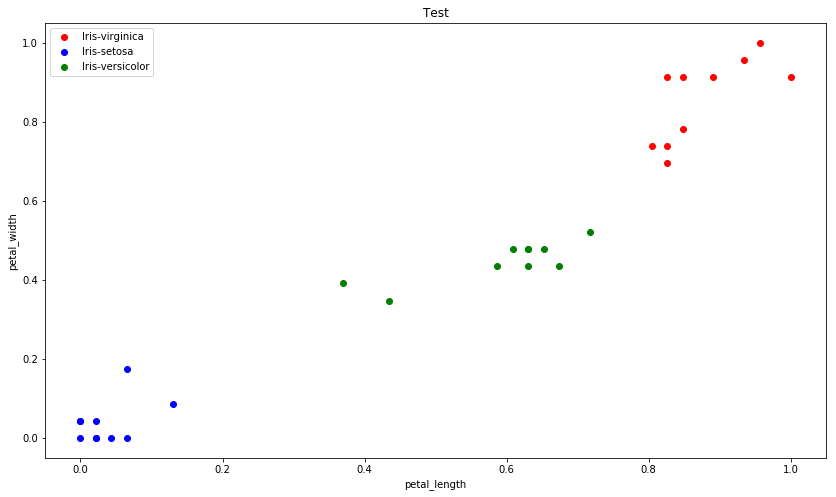

In [44]:
plotPoints(norm_test_dataArray,"Test")

<a id='section9'></a>
## Predicting Labels

The last part of the tutorial is predicting labels of unseen data i.e., we have to perform predictions of labels on the test data. As we have found a value for which our validation data works well, we will use this value of k __(i.e., 5)__ to predict the labels and find the test error.

In [45]:
def predict(test_dataArray, train_dataArray, k=5):
    """
    test_dataArray : test data array to predict data on
    train_dataArray : train data array
    k : number of neighbors to consider
    """

    for i,instance in enumerate(test_dataArray):
                
        #create a default dictionary with all labels as keys and their counts as values(initialized to 0)
        label_count = {label:0 for label in set(labelList_train)} 
        
        #find the k nearest neighbors
        nNeighbors = knn(k, instance, train_dataArray)
        
        #find the count of each label from the neighbors
        for neighbor in nNeighbors:
            label = neighbor[1]
            label_count[label]+=1
        
        #sort the label_count dictionary in descending order of count
        label_count = [(i,label_count[i]) for i in sorted(label_count, key=label_count.get, reverse=True)]
        
        #choose the label with maximum count from the k nearest neighbors
        predicted_label = label_count[0][0]
        
        print(predicted_label.decode('utf-8'))   
        

In [46]:
predict(norm_test_dataArray, norm_train_dataArray)
# print(set(labelList_train))

Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-setosa
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-versicolor
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica
Iris-virginica


<a id='section10'></a>
## Tutorial Summary

In this tutorial, we learned about the K-Nearest Neighbor and implemented K-Nearest Neighbor algorithm in Python from scratch. We have used the Iris dataset where we have divided our 150 data instances into 120 train data instances and 30 test data instances. For the classification purpose, we first found out the value of k by applying cross validation and then predicted the labels of test data set for that __k__ .

References:

Dataset:  http://archive.ics.uci.edu/ml/datasets/Iris<br>
Matplotlib: https://matplotlib.org/api/_as_gen/matplotlib.pyplot.legend.html<br>
Cross-validation: http://genomicsclass.github.io/book/pages/crossvalidation.html 

<a id='section11'></a>
## Further Resources

https://en.wikipedia.org/wiki/K-nearest_neighbors_algorithm<br>
http://scikit-learn.org/stable/modules/neighbors.html<br>
http://dataaspirant.com/2016/12/23/k-nearest-neighbor-classifier-intro/